In [1]:
using Plots
using Random

In [68]:
dT = 0.1 #Timestep

xMin = -1000
xMax = 1000
yMin = -1000
yMax = 1000
zMin = -1000
zMax = 1000

#Def Structs and Functions
mutable struct Debris
    x::Float32 #m
    y::Float32 #m
    z::Float32 #m
    dX::Float32 #m/s
    dY::Float32 #m/s
    dZ::Float32 #m/s
    m::Float32 #kg
    r::Float32 #m
end

#Random Constructor
Debris() = Debris(
    (rand(Float64)*2*xMax - xMin), 
    (rand(Float64)*2*yMax - yMin), 
    (rand(Float64)*2*zMax - zMin), 
    (rand(Float64)*50 - 25), 
    (rand(Float64)*50 - 25), 
    (rand(Float64)*50 - 25), 
    (rand(Float64)*100), 
    (rand(Float64)*30), 
)

#Weighted Constructor


initNum = 100

function step!(deb::Vector{Debris})
    i = 1
    while(i <= size(deb)[1])
        #Add movement based on velocity and time step
        deb[i].x += dT*deb[i].dX
        deb[i].y += dT*deb[i].dY
        
        #If reached  bounding box, reverse velocity in that direction.
        if deb[i].x < xMin || deb[i].x > xMax
            deb[i].dX = -deb[i].dX
        end
        if deb[i].y < yMin || deb[i].y > yMax
            deb[i].dY = -deb[i].dY
        end
        if deb[i].z < zMin || deb[i].z > zMax
            deb[i].dZ = -deb[i].dZ
        end
        
        #Subtract mass - simulate atmospheric drag for removal
        deb[i].m *= 0.9999
        if deb[i].m < 2
            deleteat!(deb, i)
            i -= 1
        end
        i += 1
    end
end

function generateNewDebris(d1::Debris, d2::Debris)
    ttlMass = floor((d1.m + d2.m)/9)
    
    avgX = d1.x + d2.x
    avgY = d1.y + d2.y
    avgZ = d1.z + d2.z
    
    newDeb = [Debris(
            (avgX + rand(Float64)*6-3), 
            (avgY + rand(Float64)*6-3), 
            (avgZ + rand(Float64)*6-3),
            (rand(Float64)*500 - 250), 
            (rand(Float64)*500 - 250), 
            (rand(Float64)*500 - 250), 
            (rand(Float64)*100), 
            (ttlMass)) 
            for _ in 1:ttlMass]
    println("Collision " + size(newDeb)[1])
    return newDeb
end

function findCollision!(deb::Vector{Debris})
   #O(n) time?

    count = 0
    i = 1
    while i < size(deb)[1]
        j = i+1
        while j <= size(deb)[1]
            if (abs(deb[i].x-deb[j].x) < deb[i].r+deb[j].r && abs(deb[i].y-deb[j].y) < deb[i].r+deb[j].r && abs(deb[i].z-deb[j].z) < deb[i].r+deb[j].r)
            
                #Check to see if actually collided
                dist = sqrt((deb[i].x - deb[j].x)^2 + (deb[i].y - deb[j].y)^2 + (deb[i].z - deb[j].z)^2)
                println("dist: " + dist)
                if (dist < deb[i].r + deb[j].r)
                    println("Collision")
                    #COLLISION
                    c1 = deb[i]
                    c2 = deb[j]
                    
                    deleteat!(deb, i)
                    deleteat!(deb, j-1) #because i was just removed
                    
                    append!(deb, generateNewDebris(c1, c2))
                    
                    i -= 1
                    break
                end
            end
            j += 1
        end
        i += 1
    end
end

function genSeries(deb::Vector{Debris})
    xArr = []
    yArr = []
    zArr = []
    print(deb)
    for i in 1:size(deb)[1]
        push!(xArr, deb[i].x)
        push!(yArr, deb[i].y)
        push!(zArr, deb[i].z)
    end
    return (xArr, yArr, zArr)
end


genSeries (generic function with 1 method)

In [69]:
#Initialize Array of Debris
debArr = [ Debris() for _ in 1:initNum ]

100-element Vector{Debris}:
 Debris(2630.3726f0, 1784.5471f0, 2195.148f0, -19.442982f0, 9.673202f0, 12.11246f0, 13.081007f0, 17.049194f0)
 Debris(2496.1396f0, 2386.4944f0, 1063.0527f0, 21.003887f0, -14.273879f0, 16.86209f0, 28.928938f0, 23.948858f0)
 Debris(2578.1807f0, 2451.0828f0, 2688.7188f0, 13.758621f0, 19.728422f0, 24.358606f0, 92.10841f0, 11.110779f0)
 Debris(1601.6692f0, 2748.133f0, 1541.8583f0, -19.854536f0, 2.51665f0, -2.0044577f0, 13.101027f0, 23.831516f0)
 Debris(2257.3784f0, 2181.5093f0, 1304.3645f0, -13.816925f0, 16.567f0, 3.283969f0, 90.824066f0, 22.924446f0)
 Debris(1070.9353f0, 1794.5125f0, 1918.1932f0, 0.46480954f0, 13.782736f0, 16.169214f0, 62.682014f0, 19.850718f0)
 Debris(2979.9717f0, 2012.6566f0, 1424.1895f0, 10.112319f0, -13.490857f0, -18.6366f0, 16.797276f0, 14.839123f0)
 Debris(2244.8225f0, 2973.7732f0, 2071.1978f0, -24.255402f0, 1.6368964f0, 19.140636f0, 86.701065f0, 18.99471f0)
 Debris(1767.079f0, 1632.2203f0, 2513.305f0, 4.3712234f0, 23.113451f0, -23.22664f0

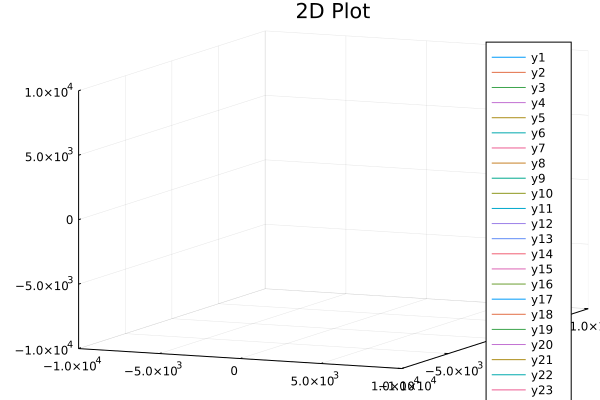

In [4]:
#Define Plot
plt = plot3d(
    100,
    xlim = (xMin, xMax),
    ylim = (yMin, yMax),
    zlim = (zMin, zMax),
    title = "2D Plot",
    marker=1,
)

In [61]:
@gif for _ ∈ 1:1000
    step!(debArr)
    findCollision!(debArr)
    xArr, yArr, zArr = genSeries(debArr)
    push!(plt, xArr, yArr, zArr)
end every 10

Debris[]

LoadError: DivideError: integer division error

In [70]:
objs = []

for _ in 1:50000
    # print(size(debArr)[1])
    step!(debArr)
    findCollision!(debArr)
    push!(objs, size(debArr)[1])
end


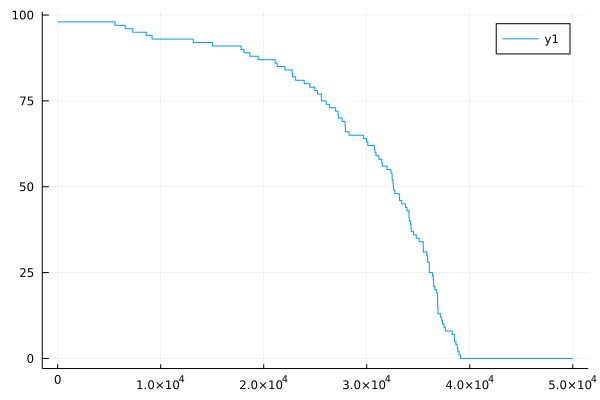

In [34]:
x = 1:50000
plot(x, objs)